<a href="https://colab.research.google.com/github/alex-pakalniskis/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module1-exploratory-data-analysis/LS_DS_111_Exploratory_Data_Analysis_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Loading and Exploring Datasets

This assignment is purposely open-ended. You will be asked to load datasets from the [UC-Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). 

Even though you maybe using different datasets than your fellow classmates, try and be supportive and assist each other in the challenges that you are facing. You will only deepend your understanding of these topics as you work to assist one another. Many popular UCI datasets face similar data loading challenges.

Remember that the UCI datasets do not necessarily have a file type of `.csv` so it's important that you learn as much as you can about the dataset before you try and load it. See if you can look at the raw text of the file either locally or using the `!curl` shell command -or in some other way before you try and read it in as a dataframe. This will help you catch what would otherwise be unforseen problems.

Feel free to embellish this notebook with additional markdown cells,code cells, comments, graphs, etc. Whatever you think helps adequately address the questions.

## 1) Load a dataset from UCI (via its URL)

Please navigate to the home page and choose a dataset (other than the Adult dataset) from the "Most Popular" section on the right-hand side of the home page. Load the dataset via its URL and check the following (show your work):

- Are the headers showing up properly?
- Look at the first 5 and the last 5 rows, do they seem to be in order?
- Does the dataset have the correct number of rows and columns as described in the UCI page? 
 - Remember, that UCI does not count the y variable (column of values that we might want to predict via a machine learning model) as an "attribute" but rather as a "class attribute" so you may end up seeing a number of columns that is one greater than the number listed on the UCI website.
- Does UCI list this dataset as having missing values? Check for missing values and see if your analysis corroborates what UCI reports?
- if `NaN` values or other missing value indicators are not being detected by `df.isnull().sum()` find a way to replace whatever is indicating the missing values with `np.NaN`.
- Use the .describe() function in order to see the summary statistics of both the numeric and non-numeric columns. 

In [0]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed


UCI Machine Learning Repository Forest Fires Data Set: https://archive.ics.uci.edu/ml/datasets/Forest+Fires

Use curl command to output file contents to terminal

In [8]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv

X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0,0
7,4,oct,tue,90.6,35.4,669.1,6.7,18,33,0.9,0,0
7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0,0
8,6,mar,fri,91.7,33.3,77.5,9,8.3,97,4,0.2,0
8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0,0
8,6,aug,sun,92.3,85.3,488,14.7,22.2,29,5.4,0,0
8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0,0
8,6,aug,mon,91.5,145.4,608.2,10.7,8,86,2.2,0,0
8,6,sep,tue,91,129.5,692.6,7,13.1,63,5.4,0,0
7,5,sep,sat,92.5,88,698.6,7.1,22.8,40,4,0,0
7,5,sep,sat,92.5,88,698.6,7.1,17.8,51,7.2,0,0
7,5,sep,sat,92.8,73.2,713,22.6,19.3,38,4,0,0
6,5,aug,fri,63.5,70.8,665.3,0.8,17,72,6.7,0,0
6,5,sep,mon,90.9,126.5,686.5,7,21.3,42,2.2,0,0
6,5,sep,wed,92.9,133.3,699.6,9.2,26.4,21,4.5,0,0
6,5,sep,fri,93.3,141.2,713.9,13.9,22.9,44,5.4,0,0
5,5,mar,sat,91.7,35.8,80.8,7.8,15.1,27,5.4,0,0
8,5,oct,mon,84.9,32.8,664.2,3,16.7,47,4.9,0,0
6,4,mar,wed,89.2,27.9,70.8,6.3,15.9,35,4,0,0
6,4,apr,sat,86.3,27.4,97.1,5.1,9.3,44,4.5,0,0
6,4,sep,tue,91,12

The top row contains the necessary column headers, so let's proceed with loading the data into pandas.

Import pandas library and read in the Forest Fires csv data

In [0]:
import pandas as pd

data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv"

df = pd.read_csv(data_url)

Next I'll display the first and last five rows of the data using .head() and .tail() attributes, respectively. 

In [267]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [12]:
df.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


The observations are out of order with respect to chronological time. The "month" Series is not ordered in a January thru December scheme. Next we can check the shape of the data set.

In [13]:
df.shape

(517, 13)

These shape results coincide with the metadata on the UCI repository. Success!

UCI indicates the Forest Fires data set contains no NaN values. 

In [15]:
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

Our results corroborate UCI's metadata (no NaN values). Finally I'll provide some descriptive statistics with the .describe() method.

In [16]:
df.describe(include="all")

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517,517,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
unique,NaN,NaN,12,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,aug,sun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,184,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.669246,4.299807,NaN,NaN,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,NaN,NaN,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,NaN,NaN,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,NaN,NaN,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,NaN,NaN,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,NaN,NaN,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000


## 2) Load a dataset from your local machine.
Choose a second dataset from the "Popular Datasets" listing on UCI, but this time download it to your local machine instead of reading it in via the URL. Upload the file to Google Colab using the files tab in the left-hand sidebar or by importing `files` from `google.colab` The following link will be a useful resource if you can't remember the syntax: <https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92>

- Answer all of the same bullet point questions from part 1 again on this new dataset. 


In [0]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed

UCI Machine Learning Repository 
Car Evaluation Data Set: https://archive.ics.uci.edu/ml/datasets/Car+Evaluation

Load the Google Colaboratory helper module for file management

Then upload the data from local storage

In [18]:
import google.colab.files as files

files.upload()

Saving car.data to car.data


{'car.data': b'vhigh,vhigh,2,2,small,low,unacc\nvhigh,vhigh,2,2,small,med,unacc\nvhigh,vhigh,2,2,small,high,unacc\nvhigh,vhigh,2,2,med,low,unacc\nvhigh,vhigh,2,2,med,med,unacc\nvhigh,vhigh,2,2,med,high,unacc\nvhigh,vhigh,2,2,big,low,unacc\nvhigh,vhigh,2,2,big,med,unacc\nvhigh,vhigh,2,2,big,high,unacc\nvhigh,vhigh,2,4,small,low,unacc\nvhigh,vhigh,2,4,small,med,unacc\nvhigh,vhigh,2,4,small,high,unacc\nvhigh,vhigh,2,4,med,low,unacc\nvhigh,vhigh,2,4,med,med,unacc\nvhigh,vhigh,2,4,med,high,unacc\nvhigh,vhigh,2,4,big,low,unacc\nvhigh,vhigh,2,4,big,med,unacc\nvhigh,vhigh,2,4,big,high,unacc\nvhigh,vhigh,2,more,small,low,unacc\nvhigh,vhigh,2,more,small,med,unacc\nvhigh,vhigh,2,more,small,high,unacc\nvhigh,vhigh,2,more,med,low,unacc\nvhigh,vhigh,2,more,med,med,unacc\nvhigh,vhigh,2,more,med,high,unacc\nvhigh,vhigh,2,more,big,low,unacc\nvhigh,vhigh,2,more,big,med,unacc\nvhigh,vhigh,2,more,big,high,unacc\nvhigh,vhigh,3,2,small,low,unacc\nvhigh,vhigh,3,2,small,med,unacc\nvhigh,vhigh,3,2,small,high,u

Use cat command to print csv file contents

In [21]:
!cat car.data

vhigh,vhigh,2,2,small,low,unacc
vhigh,vhigh,2,2,small,med,unacc
vhigh,vhigh,2,2,small,high,unacc
vhigh,vhigh,2,2,med,low,unacc
vhigh,vhigh,2,2,med,med,unacc
vhigh,vhigh,2,2,med,high,unacc
vhigh,vhigh,2,2,big,low,unacc
vhigh,vhigh,2,2,big,med,unacc
vhigh,vhigh,2,2,big,high,unacc
vhigh,vhigh,2,4,small,low,unacc
vhigh,vhigh,2,4,small,med,unacc
vhigh,vhigh,2,4,small,high,unacc
vhigh,vhigh,2,4,med,low,unacc
vhigh,vhigh,2,4,med,med,unacc
vhigh,vhigh,2,4,med,high,unacc
vhigh,vhigh,2,4,big,low,unacc
vhigh,vhigh,2,4,big,med,unacc
vhigh,vhigh,2,4,big,high,unacc
vhigh,vhigh,2,more,small,low,unacc
vhigh,vhigh,2,more,small,med,unacc
vhigh,vhigh,2,more,small,high,unacc
vhigh,vhigh,2,more,med,low,unacc
vhigh,vhigh,2,more,med,med,unacc
vhigh,vhigh,2,more,med,high,unacc
vhigh,vhigh,2,more,big,low,unacc
vhigh,vhigh,2,more,big,med,unacc
vhigh,vhigh,2,more,big,high,unacc
vhigh,vhigh,3,2,small,low,unacc
vhigh,vhigh,3,2,small,med,unacc
vhigh,vhigh,3,2,small,high,unacc
vhigh,vhigh,3,2,med,low,unacc
vhigh,vhi

There are no column headers contained in this file, so we'll use pandas to read the data and add column titles

In [0]:
column_names = ["buying","maint","doors","persons","lug_boot","safety", "class"]

cars_df = pd.read_csv("car.data", names=column_names)

Let's check to see if the column_names correctly rendered at the top and bottom of the data set.

In [30]:
cars_df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [31]:
cars_df.tail()

,buying,maint,doors,persons,lug_boot,safety,class
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


Looks good! Next check whether the shape aligns with UCI expectations.

In [32]:
cars_df.shape

(1728, 7)

While UCI indicates 6 attributes, the data contains an additonal "class" column for a total of 7 columns. The "class" column is a label predicted from other attributes. 

In [34]:
cars_df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

As expected from UCI metadata, there a no NaN values in this data set. Finally we can provide summary statistics for all attributes. 

In [36]:
cars_df.describe(include="all")

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,med,med,5more,4,med,med,unacc
freq,432,432,432,576,576,576,1210


## 3) Make Crosstabs of the Categorical Variables

Take whichever of the above datasets has more categorical variables and use crosstabs to tabulate the different instances of the categorical variables.


In [0]:
# Your Code Here

First I'll make crosstabs using categorical variables from the Car data set. 

In [69]:
pd.crosstab(cars_df["lug_boot"], cars_df["safety"])

safety,high,low,med
lug_boot,,,
big,192,192,192
med,192,192,192
small,192,192,192


In [71]:
pd.crosstab(cars_df["lug_boot"], cars_df["maint"])

maint,high,low,med,vhigh
lug_boot,,,,
big,144,144,144,144
med,144,144,144,144
small,144,144,144,144


In [72]:
pd.crosstab(cars_df["lug_boot"], cars_df["buying"])

buying,high,low,med,vhigh
lug_boot,,,,
big,144,144,144,144
med,144,144,144,144
small,144,144,144,144


In [73]:
pd.crosstab(cars_df["maint"], cars_df["buying"])

buying,high,low,med,vhigh
maint,,,,
high,108,108,108,108
low,108,108,108,108
med,108,108,108,108
vhigh,108,108,108,108


In [74]:
pd.crosstab(cars_df["maint"], cars_df["safety"])

safety,high,low,med
maint,,,
high,144,144,144
low,144,144,144
med,144,144,144
vhigh,144,144,144


The data is uniformly distributed across cross tabulation groups. For a more interesting crosstab, I ingested the Forest Fires data.

In [75]:
pd.crosstab(df["month"], df["day"])

day,fri,mon,sat,sun,thu,tue,wed
month,,,,,,,
apr,1,1,1,3,2,0,1
aug,21,15,29,40,26,28,25
dec,1,4,0,1,1,1,1
feb,5,3,4,4,1,2,1
jan,0,0,1,1,0,0,0
jul,3,4,8,5,3,6,3
jun,3,3,2,4,2,0,3
mar,11,12,10,7,5,5,4
may,1,0,1,0,0,0,0


## 4) Explore the distributions of the variables of the dataset using:
- Histograms
- Scatterplots
- Density Plots

In [0]:
# Your Code Here

Let's plot the frequency of forest fires by month as a bar plot. 

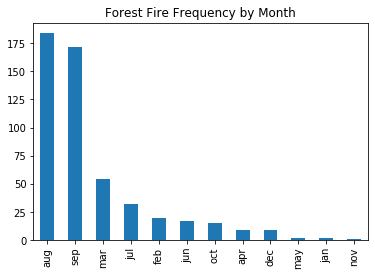

In [116]:
df["month"].value_counts().plot(kind="bar", title="Forest Fire Frequency by Month");

Next let's create a scatter plot of relative humidity and temperature. 

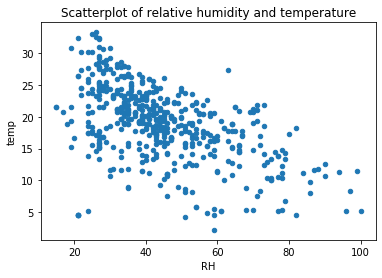

In [117]:
df.plot.scatter("RH","temp", title="Scatterplot of relative humidity and temperature");

There appears to be an inverse linear relationship between temperature and relative humidity. 

Finally we generate a kernel density estimation plot of wind conditions.

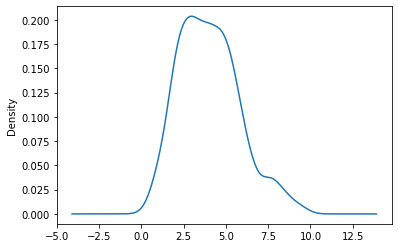

In [113]:
df["wind"].plot.density();

## 5) Create at least one visualization from a crosstab:

Remember that a crosstab is just a dataframe and can be manipulated in the same way by row index, column, index, or column/row/cell position.


In [0]:
# Your Code Here

Let's crosstabulate forest fire frequency by month and day of week.

In [268]:
crosstab_df = pd.crosstab(df["month"], df["day"])

crosstab_df

day,fri,mon,sat,sun,thu,tue,wed
month,,,,,,,
apr,1,1,1,3,2,0,1
aug,21,15,29,40,26,28,25
dec,1,4,0,1,1,1,1
feb,5,3,4,4,1,2,1
jan,0,0,1,1,0,0,0
jul,3,4,8,5,3,6,3
jun,3,3,2,4,2,0,3
mar,11,12,10,7,5,5,4
may,1,0,1,0,0,0,0


And easily plot the results

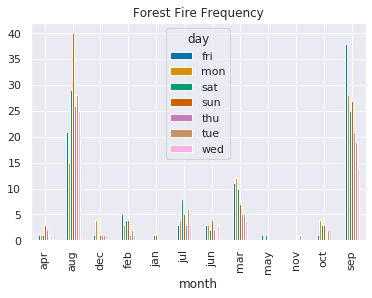

In [270]:
crosstab_df.plot(kind="bar", title="Forest Fire Frequency");

## Stretch Goals 

The following additional study tasks are optional, they are intended to give you an opportunity to stretch yourself beyond the main requirements of the assignment. You can pick and choose from the below, you do not need to complete them in any particular order.

### - Practice Exploring other Datasets

In [151]:
wine_column_headers = ["Alcohol","Malic acid","Ash","Alcalinity of ash","Magnesium","Total phenols","Flavanoids","Nonflavanoid phenols","Proanthocyanins","Color intensity","Hue","OD280/OD315 of diluted wines","Proline"]

wine_data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

wine_df = pd.read_csv(wine_data_url, names=wine_column_headers)

wine_df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### -  Try using the Seaborn plotting library's "Pairplot" functionality in order to explore all of the possible histograms and scatterplots of your dataset all at once:

[Seaborn Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

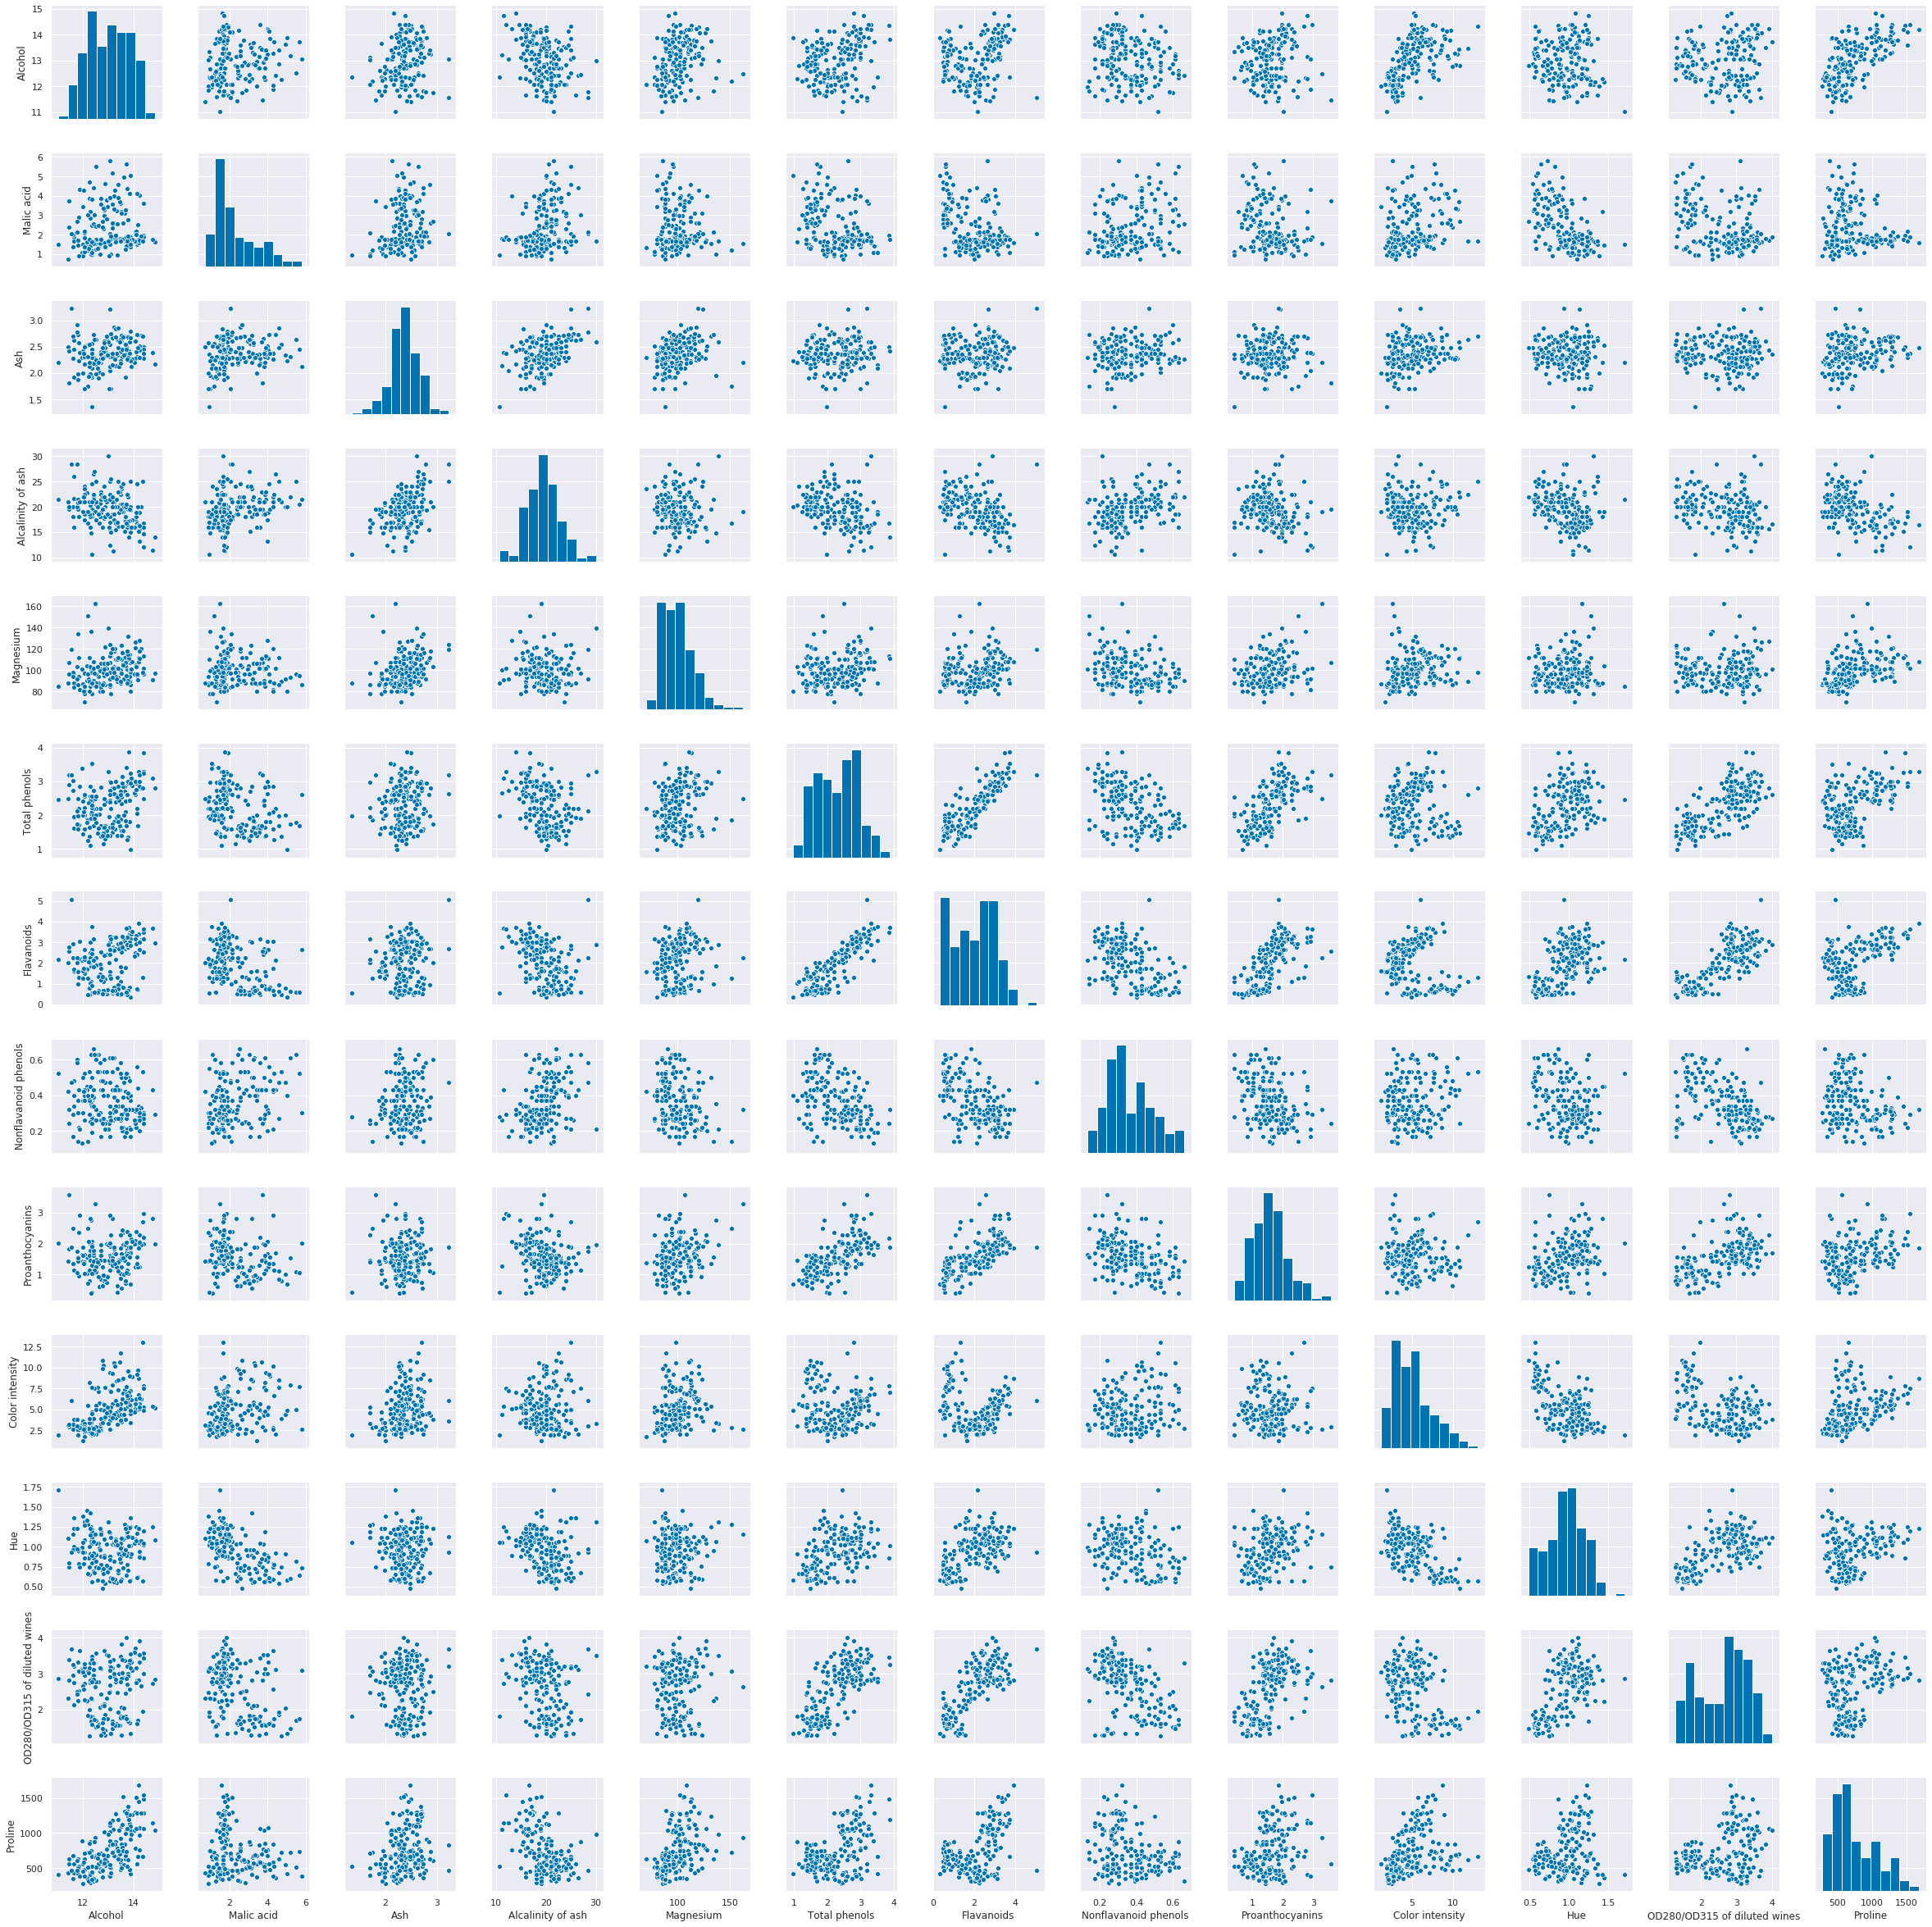

In [157]:
import seaborn as sns
sns.set(palette="colorblind")

sns.pairplot(wine_df)

### - Turn some of the continuous variables into categorical variables by binning the values using:
- [pd.cut()](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html)
- [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)
- <https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut>

And then use crosstabs to compare/visualize these binned variables against the other variables.

Let's start by comparing crosstabulated columns using cut and qcut functions. The cut function creates groups with equal break points across the range of values. 

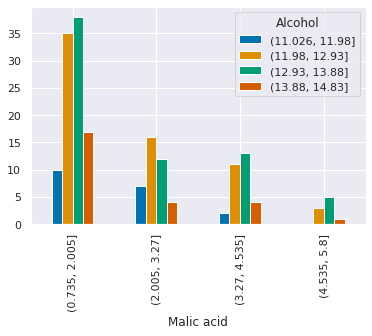

In [171]:
pd.crosstab(pd.cut(wine_df["Malic acid"], 4), pd.cut(wine_df["Alcohol"], 4)).plot(kind="bar")

In contrast the qcut function generates groups with different value ranges but equal frequency domains.

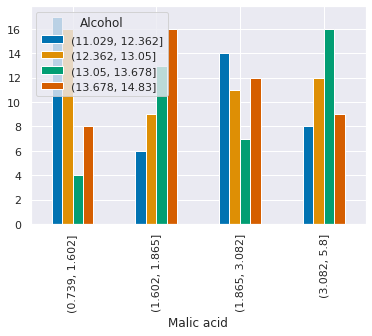

In [177]:
pd.crosstab(pd.qcut(wine_df["Malic acid"], 4), pd.qcut(wine_df["Alcohol"], 4)).plot(kind="bar")

The differences between qcut and cut are further evidences with Ash and Alcalinity of ash.

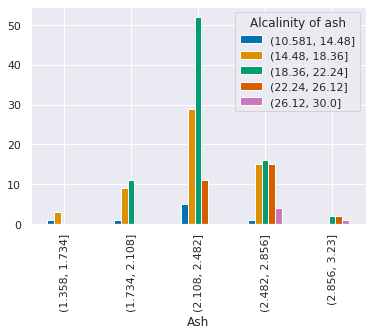

In [173]:
pd.crosstab(pd.cut(wine_df["Ash"], 5), pd.cut(wine_df["Alcalinity of ash"], 5)).plot(kind="bar")

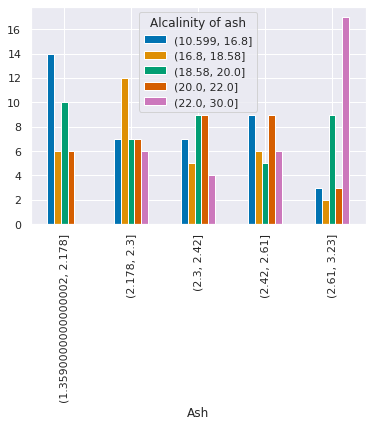

In [174]:
pd.crosstab(pd.qcut(wine_df["Ash"], 5), pd.qcut(wine_df["Alcalinity of ash"], 5)).plot(kind="bar")

### - Other types and sources of data
Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.

For my stretch goal, I'll use the Los Angeles Open Data Portal API to retrieve a Listing of Active Businesses in the city.
https://data.lacity.org/A-Prosperous-City/Listing-of-Active-Businesses/6rrh-rzua

In [232]:
api_data_url = "https://data.lacity.org/resource/6rrh-rzua.csv"

api_df = pd.read_csv(api_data_url)

api_df.head()

,location_account,business_name,dba_name,street_address,city,zip_code,location_description,mailing_address,mailing_city,mailing_zip_code,naics,primary_naics_description,council_district,location_start_date,location_end_date,location_1
0,0000000108-0001-3,PALACE OF VENICE GUEST HOME /C,NaN,1727 CRENSHAW BLVD,LOS ANGELES,90019-6037,1727 CRENSHAW 90019-6037,NaN,NaN,NaN,721310.0,Rooming & boarding houses,10,1991-05-15T00:00:00.000,NaN,"(34.0425, -118.3295)"
1,0000000115-0001-3,VINCENZO LABELLA,NaN,521 SWARTHMORE AVENUE,PACIFIC PALISADES,90272-4350,521 SWARTHMORE 90272-4350,521 SWARTHMORE AVENUE,PACIFIC PALISADES,90272-4350,561500.0,Travel arrangement & reservation services,11,1990-01-01T00:00:00.000,NaN,NaN
2,0000000121-0001-9,WILCARE ECONOMIC DEVELOPMENT CORPORATION,NaN,9911 AVALON BLVD,LOS ANGELES,90003-4805,9911 AVALON 90003-4805,448 E 99TH STREET,LOS ANGELES,90003-4804,721310.0,Rooming & boarding houses,8,1999-01-01T00:00:00.000,NaN,"(33.9463, -118.2651)"
3,0000000132-0001-7,CARLOS ANGEL,NaN,1221 W 7TH STREET SUITE #N-407,LOS ANGELES,90017-2689,1221 7TH 90017-2689,NaN,NaN,NaN,561300.0,Employment services,1,1999-07-01T00:00:00.000,NaN,"(34.0518, -118.2665)"
4,0000000133-0001-1,A A OFICINA CENTRAL HISPANA DE LOS ANGELES /C,NaN,4917 S BROADWAY,LOS ANGELES,90037-3211,4917 BROADWAY 90037-3211,2607 VAN BUREN PLACE,LOS ANGELES,90007-2129,611000.0,"Educational services (including schools, colle...",9,1991-01-01T00:00:00.000,NaN,"(33.9981, -118.2783)"


In [231]:
api_df.shape

(1000, 18)

The first one thousand results of the API call are returned.